Author 
- Ananthram K S, NITK Surathkal


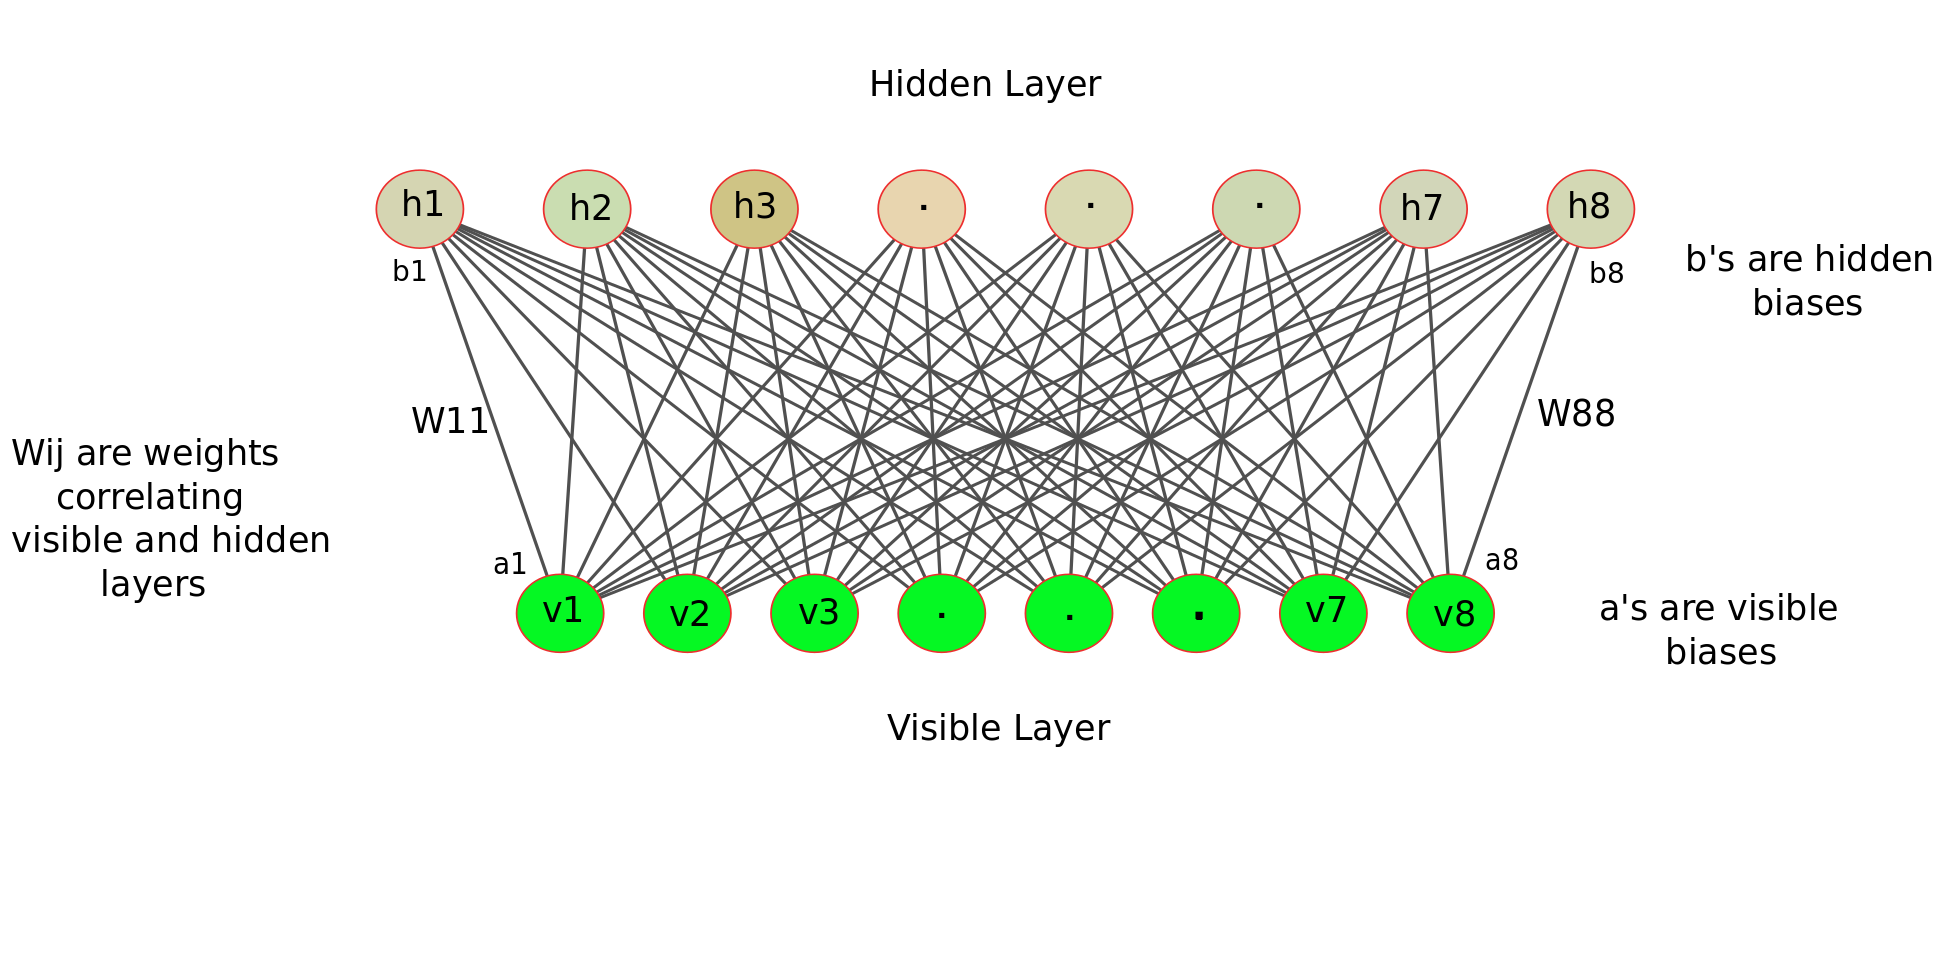

In [5]:
from IPython.display import Image
Image("rbm.png", width=650, height=600)

## Boltzmann Machine and RBM


A Boltzmann machine is a stochastic neural network which uses an unsuprivised learning method. It is stochastic because it's activation is stochastic. 
<br>
<br>
The values at the neurons are always set to either +1 or -1. The probability of a neuron in a state is defined as  

\begin{equation}
P(x_i=1)=\frac{1}{1+e^{-2a_i}}
\end{equation}


$a_i$ is the activation for that neuron. 
<br>
<br>
To get an expected outcome on an RBM weights are learned or in otherwords, likelihood of the dataset is maximized for given weights W. 
<br>
<br>
Likelihood is defined as a product of conditional probability of x being the expected outcome for a set of learned W. 
\begin{equation}
P(x|W)= \prod_{n=1}^N P(x^{(n)}\vee W)
\end{equation}
<br>
'W' is weight matix, $x^{(n)}$ is the $n^{th}$ sample from dataset 'x' of size 'N'.
<br>
<br>
In Boltzmann Machine in matrix notation 
\begin{equation}
P(x|W)= \prod_{n=1}^N \frac{e^{\frac{1}{2} {x^{(n)}}^T W x^{(n)}}}{Z}
\end{equation}
<br>
<br>
Where  $Z=\sum_{x^{\prime} \in P(x \vee W)} e^{\frac{1}{2} {x^{(\prime)}}^T W x^{(\prime)}}$

<br>
<br>
<div class="alert alert-block alert-info">
<b>Note 1:</b> Bayes' Theorem:- $$P(A|B)=\frac{P(A|B) \times P(A)}{P(B)}$$
<b>Note 2:</b> Given knowledge we have on the system is called prior.
<br>
<b>Note 3:</b> Conditional probability is $$P(A|B)=\frac{P(A\& B)}{P(B)}$$
<br>
<b>Note 4:</b> The defination probability of A or B is $$P(A \vee B)=P(A)+P(B)-P(A \& B)$$
    The events A nad B are not mutually exclusive.  
</div>
<br>    

<br>

Restricted Boltmann Machine is an energy based model. It's energy function is defined as \begin{equation}
P(\nu)=\frac{e^{(-E(\nu))}}{Z}
\end{equation}
<br>
<br>
it is a probability of given state $\nu$, E is the energy, Z is the partition function. 
<br>
<br>
The sum of all possible configuration of '$\nu$' is defined as, \begin{equation}
Z=\sum_{\nu} e^{-E(\nu)}
\end{equation}
<br>
<br>
Goal of RBM is to model probability distributions. Use neural network to generate previously unseen examples, according to a learnt probability distribution from training.
<br>
<br>
For example in physics the solution will exploit the connection between neural network and statistical physics of spin model. Probability states of a physical system depends on energy of the configuration. They occur less likely for high energy state and more likely for a less energy state configuration. 
<br>
<br>
In physics at thermal equilibrium, probability of state 's' is given by \begin{equation}
P(s)=\frac{1}{Z} e^{-\frac{E(s)}{k_B T}}
\end{equation}
Where Z is the normalization or partition function, obtained from summing energy exponents over all states.
<br>
<br>
## RBM Implimentation 
Its a two layered network. Input layer and an output layer. These two layers are connected, activation of each input node is multiplied by the matrix of weights, then bias vector is added. Each output node is put through an activation function. In RBM these layers are referred asvisible and hidden layers. 
<br>
<br>
The main idea is, when training the visible nodes represent known information we have. The hidden nodes will aim to represent some variables that generate the visible data. The whole process is to reconstruct and construct known data and variable at the output end. 
<br>
<br>
The basis of learning the weights of a RBM comes from statistical physics and uses an energy based model. In this model every state is put through an energy function which is related to the probability of state occuring. If energy function returns a high value, we expect this state to be unlikely or rarely occuring. Conversly, a low result from energy function is a state that is more stable and will occur more frequently. 
<br>
<br>
RBM has a little modification in its energy function. It is parametrized according to the required model structure. \begin{equation}
E(v,h)=-a^T v-b^T h-v^T W h
\end{equation} 
Here state 'x' is parametrized in terms of visible nodes 'v' and hidden nodes 'h'. And 'a' and 'b' are visible and hidden baises. 
<br>
<br>
From above conditional independency, 
\begin{equation}
P(h|v,W,b)=activation(vW+b)
\end{equation}

\begin{equation}
P(v|h,W,b)=activation(hW^T+a)
\end{equation}

Now consider the energy function defined in the visible layer 
\begin{equation}
P(v)= \frac{1}{Z} \sum_h e^{\sum_i a_i v_i + \sum_j b_j h_j + \sum_{i,j} v_i h_j W_{ij}}
\end{equation}
Summing over all hidden neurons we have, 
$$P(v)=\frac{1}{Z} \Big( e^{\sum_i a_i v_i + \sum_j b_j + \sum_i v_i W_{ij}}\Big)$$
or $$P(v)=\frac{1}{Z} e^{\sum_i a_i v_i} \prod_j \big( 1+e^{b_j + \sum_i v_i W_{ij}}\big)$$
Taking natural logarithm, (since probability products can be very small) 
\begin{equation}
ln P(v|W,a,b)=\sum_{n=1}^N \Bigg({\Big(av+\sum_i log \sum_j \Big(1+ e^{h_j (b+W_i v)}\Big)\Big)-Z}\Big)
\end{equation}
Taking gradient with respect to different parameters we have for weight update as, 
\begin{equation}
\frac{\partial}{\partial W_{ij}} lnP(v) = \frac{\frac{\partial}{\partial W_{ij}} \sum_h P(v,h)}{\sum_h P(v,h)}=\frac{\frac{\partial}{\partial W_{ij}} \big(\frac{1}{Z} \sum_h e^{-E(v,h)}\big)}{\frac{1}{Z}\sum_h e^{-E(v,h)}}
\end{equation}
which can simplified as, 
\begin{equation}
\frac{\partial}{\partial W_{ij}} lnP(v) = \frac{\frac{\partial}{\partial W_{ij}} \sum_h e^{-E(v,h)}}{\sum_h e^{-E(v,h)}}-\frac{\frac{\partial}{\partial W_{ij}}\big(\frac{1}{Z}\big)}{\frac{1}{Z}}
\end{equation}

or 
\begin{equation}
\frac{\partial}{\partial W_{ij}} lnP(v) = \frac{\sum_h v_i h_j e^{-E(v,h)}}{\sum_h e^{-E(v,h)}} - \frac{\sum_{v', h'} v_i ^{\prime} h_j ^{\prime} e^{-E(v',h')}}{Z}
\end{equation}

Where visible and hidden neurons values in the reconstruction phase is primed. If we use the categorical cross entropy as loss function $$C=-\sum_v P_0 (v) lnP(v)$$ and use the definations for $$P(h|v)=\frac{e^{-E(h,v)}}{Z P(v)}$$ $$Z=\sum_{v,h} e^{-E(v,h)}$$ and $$P(v,h)=\frac{e^{-E(v,h)}}{Z}$$ then for updating weights 

\begin{equation}
\sum_v P_0 (v) \frac{\partial}{\partial W_{ij}} lnP(v) = \sum_{v,h} P(h|v)P_0(v)-\sum_{v',h'} v_i ^{\prime} h_j ^{\prime} P(v'|h')P(v')
\end{equation}

$P_0(v)$ is the initially assumed distribution for the sample v, and $P(v')$ correct distribution belongs to the Boltzmann machine.    
<br>
<br>
The first term represents the correlation between visible and hidden layer neurons in the forward phase. And the second term is the correlation between the hidden and visble layer neurons in the reconstruction phase. Here the correlation can be thought of a spin coupling in an Ising model which is represented by weight matrix. Correaltion values contribute positively in the forward pass by increasing the weight values and a negative contribution in reconstruction phase.   
<br>
<br>
The goal of the network is adopt weights and biases such that the probability distribution of a set of training sample is approximately reproduced by $P(v)$. Or to achieve $P_0(v)=P(v)$ 

In [23]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
import os
from tensorflow.examples.tutorials.mnist import input_data # Calling MNIST dataset

In [24]:
VISIBLE_NODES = 784
HIDDEN_NODES = 400
LEARNING_RATE = 0.01

In [25]:
mnist = input_data.read_data_sets("MNIST_data/") 

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [26]:
input_placeholder = tf.placeholder("float", shape=(None, 784))
# Assigning one visible node for each pixel
# A placeholder object in TensorFlow represents values that will be passed in to the
# computational graph during usage

In [27]:
weights = tf.Variable(tf.random_normal((784, 300), mean=0.0, stddev=1./784)) 
# W of our equation
# initializing it from a normal distribution of size 784 by 300, the number of visible nodes to hidden nodes

In [28]:
hidden_bias = tf.Variable(tf.zeros([300])) 
visible_bias = tf.Variable(tf.zeros([784]))
# 'a' and 'b' are initialized to zeros

In [29]:
hidden_activation = tf.nn.sigmoid(tf.matmul(input_placeholder, weights) + hidden_bias)
# This represents the activation of hidden nodes.
# If we apply a sigmoid activation function then this activatiuon can be put into a binomial distribution so that all 
# values in the hidden layer either go to 0 or 1. 

In [30]:
visible_reconstruction = tf.nn.sigmoid(tf.matmul(hidden_activation, tf.transpose(weights)) + visible_bias) 
# reconstruction of visible layer by giving hidden activation 

In [31]:
final_hidden_activation =  tf.nn.sigmoid(tf.matmul(visible_reconstruction, weights)+ hidden_bias)
# Activation of hidden nodes from visible reconstruction, these are the parameters that we are after.  

In [32]:
positive_phase = tf.matmul(tf.transpose(input_placeholder), hidden_activation) 
# computing positive phase 

In [33]:
negative_phase = tf.matmul(tf.transpose(visible_reconstruction), final_hidden_activation) 
# Computing negative phase 

In [34]:
weights_update = weights.assign_add (LEARNING_RATE * (positive_phase-negative_phase))
# assign_add will add the calculated quantity to the variable.
# Scaling the positive and negative phase by learning rate and updating the weights.

In [35]:
visible_bias_update = visible_bias.assign_add(LEARNING_RATE * tf.reduce_mean(input_placeholder - visible_reconstruction, 0)) 
# Updating visible bias

In [36]:
hidden_bias_update = hidden_bias.assign_add(LEARNING_RATE *  tf.reduce_mean(hidden_activation - final_hidden_activation, 0)) 
# Updating hidden bias

In [37]:
train_op = tf.group(weights_update, visible_bias_update,  hidden_bias_update) 
#tf.group computes all specified operations together

In [38]:
loss_op = tf.reduce_sum(tf.square(input_placeholder -  visible_reconstruction))
# loss_op will haev an Error function MSE (Mean Square Error) to get to know the traning status. 

In [39]:
session = tf.Session() 
session.run(tf.global_variables_initializer()) 
# Actual computation on GPU for all variables in initialized.
# tf.session() will start the computation on the hardware

In [40]:
RL=[]
current_epochs = 0
for i in range(10):    
    total_loss = 0    
    while mnist.train.epochs_completed == current_epochs:        
        batch_inputs, batch_labels = mnist.train.next_batch(100)        
        _,reconstruction_loss = session.run([train_op, loss_op], feed_dict={input_placeholder: batch_inputs})        
        total_loss += reconstruction_loss
        
    print("epochs %s loss %s" % (current_epochs,reconstruction_loss))
    
    current_epochs = mnist.train.epochs_completed
    print("total loss is = ", total_loss)
    RL.append(reconstruction_loss)
reconstruction = session.run(visible_reconstruction, feed_dict={input_placeholder:[mnist.train.images[0]]})
print(reconstruction_loss)
# In Every iteration 100 mnist images are taken in batch and at the end of each epoch 
# total error and reconstruction error is calculated.   

epochs 0 loss 1035.5371
total loss is =  1311155.1827392578
epochs 1 loss 845.7312
total loss is =  531751.9178466797
epochs 2 loss 643.48627
total loss is =  428301.9624633789
epochs 3 loss 722.03235
total loss is =  366533.4444580078
epochs 4 loss 562.4343
total loss is =  326753.18783569336
epochs 5 loss 507.9071
total loss is =  300549.7052001953
epochs 6 loss 521.6827
total loss is =  282890.98095703125
epochs 7 loss 564.78973
total loss is =  270270.2633666992
epochs 8 loss 460.84488
total loss is =  261199.75634765625
epochs 9 loss 451.454
total loss is =  252980.57553100586
451.454


In [41]:
plt.plot(RL)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

The above graph indicates that when the training is done over 10 epochs, the reconstruction error and total loss decreases. That means the constructed RBM is succesfully learning the network parameters thereby it is able reconstruct its own probability distribution learning from the sample. 

# References
1. Morningstar, Alan and Melko, Roger G, Deep Learning the Ising Model Near Criticality, arXiv:1708.04622v1
<br>
2. Carrasquilla, Juan and Melko, Roger G, Machine learning phases of matter, 10.1038/NPHYS4035.
<br>
3. Brownlee, Jason, Machine Learning With Python.pdf
<br>
4. Coates, Adam, Deep learning library, DeepLearningLib.pdf
<br>
5. Chris Albon - Machine Learning with Python Cookbook, Practical Solutions from Preprocessing to Deep Learning-O'Reilly Media (2018)
<br>
6. Geron, Hands-On Machine Learning with Scikit-Learn and TensorFlow Concepts, Tools, and Techniques to Build Intelligent Systems-O'Reilly Media (2017)
<br>
7. Antonio Gulli, Sujit Pal - Deep Learning with Keras, Implementing deep learning models and neural networks with the power of Python-Packt Publishing (2017).
